In [2]:
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(stringr))
library(hise)
library(plyr)
library(purrr)
library(vegan)
#library(arrow)
library(parallel)
library(ComplexHeatmap)
library(ggsci)
library(tidyverse)

In [3]:
source_data <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Figure_Notebooks/Intermediate_files/nDEGs_counts_sourcedata.csv")

In [4]:
head(source_data)

,X,celltype,Direction,sex,count
,<int>,<chr>,<chr>,<chr>,<int>
1,1,ASDC,BR1,Female,0
2,2,Activated memory B cell,BR1,Female,0
3,3,Adaptive NK cell,BR1,Female,0
4,4,BaEoMaP cell,BR1,Female,0
5,5,C1Q+ CD16 monocyte,BR1,Female,0
6,6,CD4 MAIT,BR1,Female,0


In [5]:
# Assuming your data frame is named df
source_data <- source_data %>%
  mutate(sex_label = ifelse(sex == "Male", "M", "F"))
head(source_data)

,X,celltype,Direction,sex,count,sex_label
,<int>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,ASDC,BR1,Female,0,F
2,2,Activated memory B cell,BR1,Female,0,F
3,3,Adaptive NK cell,BR1,Female,0,F
4,4,BaEoMaP cell,BR1,Female,0,F
5,5,C1Q+ CD16 monocyte,BR1,Female,0,F
6,6,CD4 MAIT,BR1,Female,0,F


In [6]:
#subet the data for only CD14 monocyte subsets



# List of cell types you want to subset
selected_celltypes <- c("Core CD14 monocyte", "ISG+ CD14 monocyte", 'IL1B+ CD14 monocyte', 'Intermediate monocyte', 'Core CD16 monocyte', 'ISG+ CD16 monocyte', 'C1Q+ CD16 monocyte')


# Subset the dataframe for selected cell types
subset_df <- source_data %>%
  filter(celltype %in% selected_celltypes) %>%
  mutate(
    celltype = factor(celltype, levels = selected_celltypes),
    sex_label = factor(sex_label, levels = c("M", "F"))
  )


# View the subset dataframe
head(subset_df)


,X,celltype,Direction,sex,count,sex_label
,<int>,<fct>,<chr>,<chr>,<int>,<fct>
1,5,C1Q+ CD16 monocyte,BR1,Female,0,F
2,18,Core CD14 monocyte,BR1,Female,21,F
3,19,Core CD16 monocyte,BR1,Female,0,F
4,37,IL1B+ CD14 monocyte,BR1,Female,0,F
5,39,ISG+ CD14 monocyte,BR1,Female,5,F
6,40,ISG+ CD16 monocyte,BR1,Female,3,F


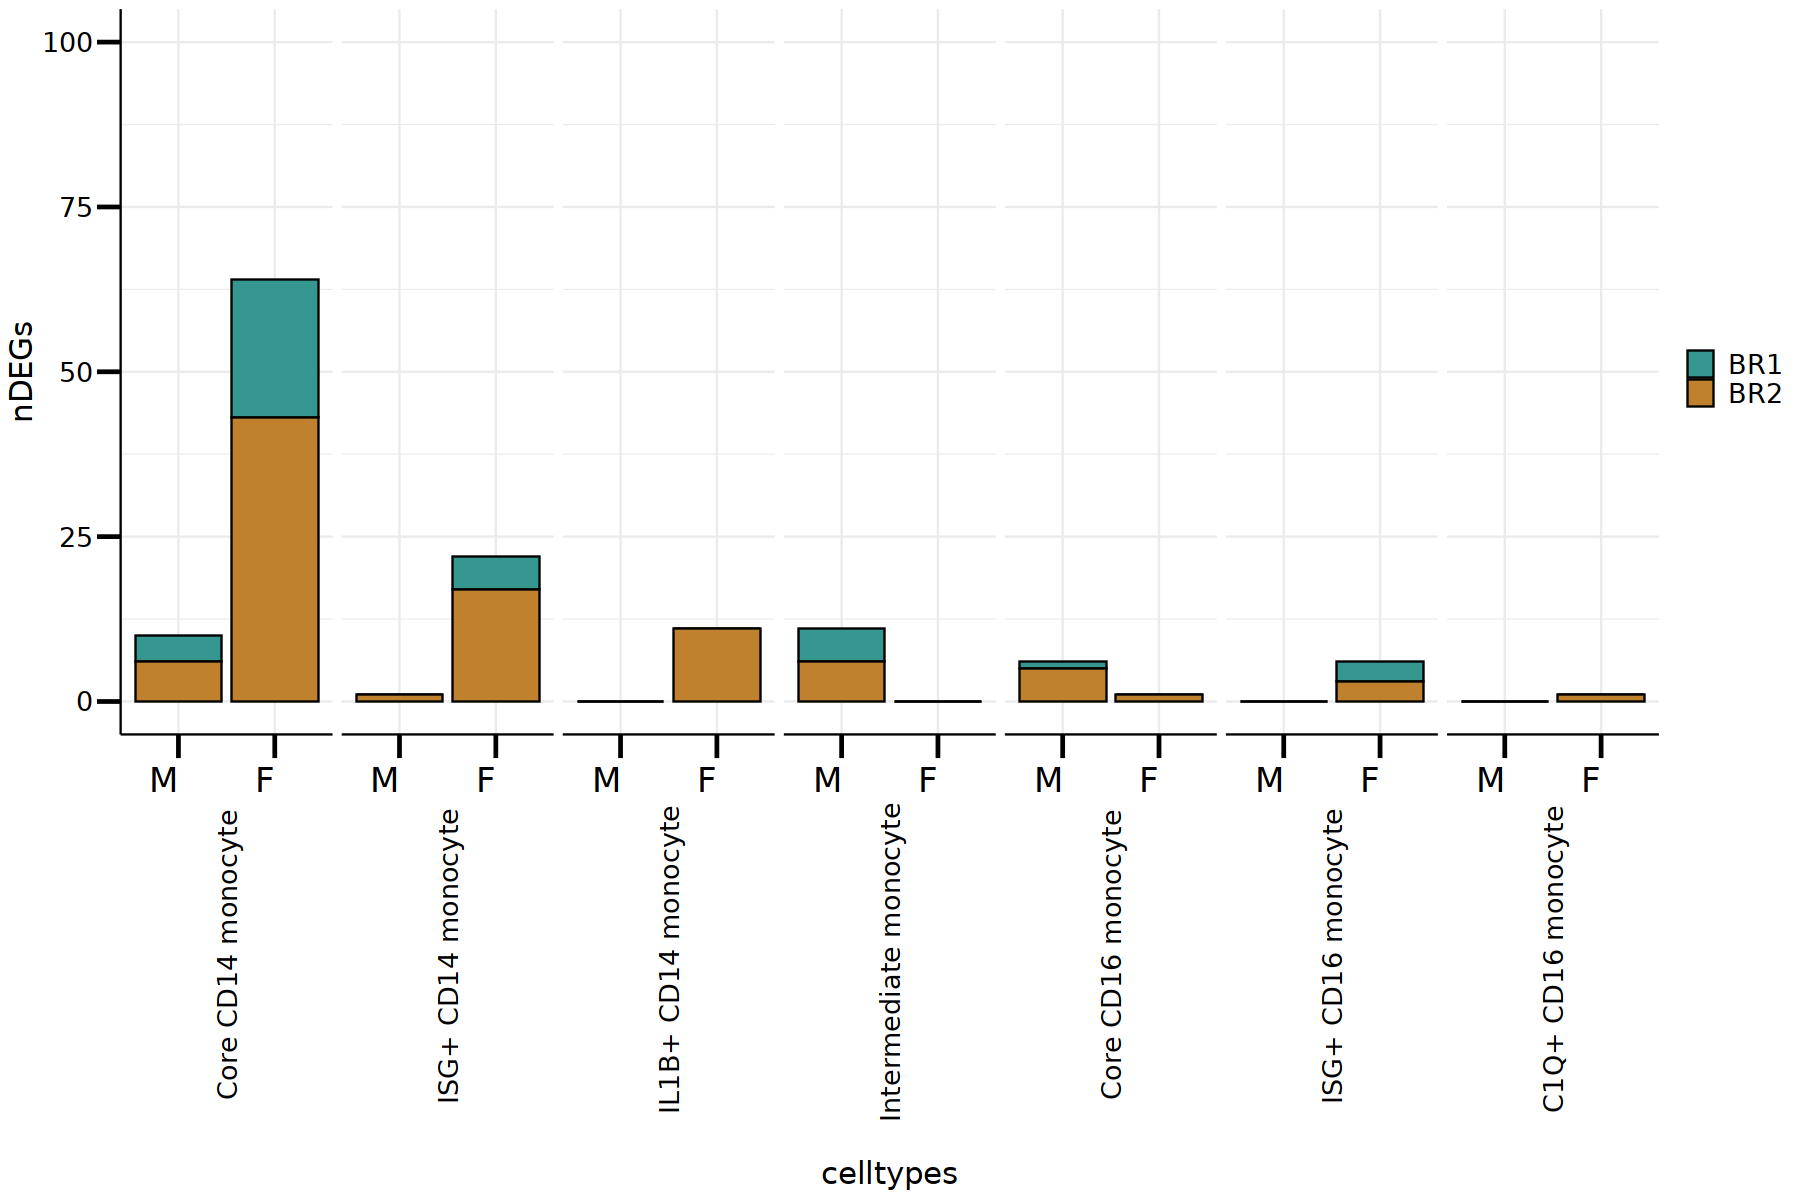

In [7]:
# Grouped and stacked

# Define colors for BR2 and BR1
#direction_colors <- c("BR2" = "green", "BR1" = "yellow")
direction_colors <- c("BR2" = "#bf812d", "BR1" = "#35978f")

options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(subset_df, aes(fill=Direction, y=count, x=sex_label)) + 
    geom_bar(position="stack", stat="identity", color= "black")+
facet_grid(~ celltype, scales = 'free', switch = 'x') +
scale_fill_manual(values = direction_colors) +
theme_minimal()+
  # theme(strip.placement = "outside",
  #       strip.background = element_rect(fill = NA, color = "white"),
  #       panel.spacing = unit(-.01,"cm"))+
theme(
    text = element_text(size = 16, color = "black"),  
    axis.text.x = element_text(size = 20, angle = 0, hjust = 1, color = "black", vjust = 0.25),
    axis.text.y = element_text(size = 16, color = "black"),
    axis.title = element_text(size = 18, color = "black"),  
    legend.title = element_blank(),  
    legend.text = element_text(size = 16),  
    axis.ticks = element_line(color = 1, linewidth = 1),
    axis.line = element_line(colour = "black", size = 0.5, linewidth = "solid"),
    axis.ticks.length  = unit(0.5, "cm"),
    strip.placement = "bottom",  # Place facet labels at the bottom
    strip.text = element_text(size = 16, color = "black", angle = 90, hjust = 0.75),  # Angle facet labels
    #panel.border = element_rect(color = "black", fill = NA, size = 1)
  )+ ylim (0,100)+  labs(x = "\ncelltypes", y = "nDEGs")